# **Jupyter notebook (Caracterización de redes y topologías biológicas)**
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## **Práctica 1: Análisis de redes con NetworkX**

En esta práctica vamos a calcular algunos parámetros de un grafo de pequeño tamaño, a continuación, vamos a cargar una red de interacción de proteínas, vamos a calcular sus principales parámetros mediante NetworkX y vamos a compararlos con los de un grafo aleatorio que tenga un número similar de nodos y ramas.

### **Apartado 1**

Este ejercicio debe realizarse con lápiz y papel (o con lápiz y Word) ya que debéis indicar los cálculos que habéis realizado.

**1. Representad el siguiente grafo dirigido mediante (a) una matriz de adyacencia y (b) una lista de adyacencia.**

(a) Matriz de adyacencia
<pre>
0	1	0	0	1	0	0	0	0	1
0	0	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	0	0	0
0	1	0	0	1	0	0	0	0	0
1	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	1	1
0	0	0	0	0	1	0	1	1	0
0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	1	0	0
1	0	0	0	0	1	0	0	0	0
</pre> 

(b) Lista de adyacencia

<pre>
1 → 2, 5, 10
2
3 → 4 
4 → 2, 5
5 → 1
6 → 9, 10
7 → 6, 8, 9
8
9 → 6, 8
10 → 1, 6
</pre>

**2.1 Responded a las siguientes preguntas:**

**a. ¿Es ponderado?**

No, ya que las ramas no tienen pesos asignados.

**b. ¿Es conexo?**

No, ya que, debido a que se trata de un grafo dirigido, hay nodos desde los que no se puede ir a otros. Por ejemplo, desde $V_2$ no se puede ir a otros nodos. 

**c. ¿Es débilmente conexo?**

Sí, ya que, obviando la cardinalidad, se puede ir desde cualquier nodo a otro.

**d. ¿Cuál es su tamaño y su orden?**

El tamaño (número de ramas) es 16 y el orden (número de nodos) es 10. 

**e. ¿Tiene algún punto de articulación? En caso positivo, indica cual.**

Considerando que se trata de un grafo no dirigido, hay 3 puntos de articulación: $V_4$, $V_1$, $V_{10}$ y $V_6$ (si se quita alguno de ellos, el grafo se vuelve inconexo).

**f. ¿Tiene lazos?**

Un lazo o bucle es que una rama sale y vuelve al mismo nodo. En este grafo, no hay ninguno.


**g. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

Un ciclo es un circuito en el que no repetimos vértices. A su vez, un circuito es un paseo cerrado en el que no se repiten ramas. Es decir, debemos buscar un pasero que salga de un punto y vuelva a él sin repetir ramas ni vértices. En este grafo, se pueden observar 4 ciclos: 

* $V_5-V_1$
* $V_5-V_{10}$
* $V_{10}-V_6$
* $V_6-V_9$

**h. ¿Existe algún camino entre los nodos 4 y 7? En caso positivo, indica cual es y su longitud.**

Teniendo en cuenta que se trata de un grafo dirigido, no existe un camino entre los nodos 4 y 7. 

**i. ¿Existe algún camino entre los nodos 3 y 9? En caso positivo, indica cual es y su longitud.**

Desde el nodo 3 al 9 sí existe un camino, cuya longitud es 6.

**2.2 Considera ahora el grafo como un grafo no dirigido.**

**a. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.**

El grafo no dirigido presenta 3 ciclos.

**b. ¿Cuál es el mayor valor de k para el cual existe un k-core?.**

Un k-core es un subgrafo en el que todos los nodos tienen el mismo número de vecinos. Por tanto, el mayor valor de  𝑘  con el que se puede construir un k-core es 3 considerando los nodos 6, 7, y 9, por ejemplo.

**c. Calcula el índice de clusterización del nodo 10.**

El índice de clusterización se calcula mediante la Ecuación 1, donde $N_v$ es el número de ramas que hay entre los vecinos de $v$ y $k_v$ es el grado de $v$. Por tanto, al no haber ramas que unan a los vecinos del nodo 10, su índice de clusterización es 0.

$$C_v = \frac{N_v}{\left(\frac{k_v(k_v-1)}{2}\right)}\tag{1}$$

**d. Calcula el camino carácterístico del nodo 10.**

El camino característico mide el grado de separación de los nodos. Se calcula midiendo la distancia del nodo en cuestión a todos los demás nodos y dividiendo por el número de vértices - 1. Formalmente, la expresión se correpsonde con la Ecuación 2:

$$L_v=\sum_{k=1}^{|V|}\frac{d(V,V_k)}{|V|-1}\tag{2}$$

En el caso del nodo 10 es $20/9 = 2.22$

**e. Existe algún cliqué de orden mayor de 2. En caso positivo, indica los nodos que lo componen.**

No, no existe ningún cliqué de grado mayor de 2, ya que no hay ningún subgrafo completo en el que todos los nodos tengan dicho grado.

### **Apartado 2**

Análisis de una red de interacción de proteínas mediante NetworkX.

**1. Descargad de Moodle el grafo CaernoElegans-LC_uw.txt, el grafo contiene una red de interacción de proteínas correspondiente al gusano _Caernobidis elegans_.**

**2. El fichero que contiene la red está en formato lista de ramas, por tanto, cargad el grafo en una variable G_CE mediante la función ``read_edgelist("CL-LC_uw.txt")``.**

**3. Obtened e imprimid por la salida el orden y el tamaño del grafo y averiguad si el grafo es dirigido o no. ¿Es un grafo denso o disperso?**

In [1]:
# En primer lugar, se importan las librerías necesarias

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import string

In [2]:
# A continuación, se cargan los datos del fichero CaernoElegans-LC_uw.txt

G_CE = nx.read_edgelist("CaernoElegans-LC_uw.txt")

# Cálculos necesarios
n = nx.number_of_nodes(G_CE)
m = nx.number_of_edges(G_CE)
info = nx.info(G_CE)
directionality = nx.is_directed(G_CE)
dens = nx.density(G_CE)

# Respuestas
display(Markdown("""
<br>

Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<pre>{2}</pre>
<br>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es True, es dirigido; si es False, no es dirigido. Así, ¿es dirigido el
grafo de estudio? 

    {3} (no es dirigido).

<br>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En este caso, podemos observar cómo el coeficiente de densidad es igual a {4}, por lo que se trata de un grafo
disperso.

<br>
                 """.format(n, m, info, directionality, round(dens, 7))))


<br>

Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: 1387
* Tamaño del grafo: 1648

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<pre>Name: 
Type: Graph
Number of nodes: 1387
Number of edges: 1648
Average degree:   2.3764</pre>
<br>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es True, es dirigido; si es False, no es dirigido. Así, ¿es dirigido el
grafo de estudio? 

    False (no es dirigido).

<br>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En este caso, podemos observar cómo el coeficiente de densidad es igual a 0.0017145, por lo que se trata de un grafo
disperso.

<br>
                 

**4. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m)**

**5. Indica si ambos grafos son conexos.**

In [3]:
G_AL = nx.gnm_random_graph(n, m)

print("¿Es el grafo G_CE conexo?", nx.is_connected(G_CE))
print("¿Es el grafo G_AL conexo?", nx.is_connected(G_AL), "\n")

## búsqueda en anchura?
print("El número de componentes conexas de G_CE es:", nx.number_connected_components(G_CE))
print("El número de componentes conexas de G_AL es:", nx.number_connected_components(G_AL))

¿Es el grafo G_CE conexo? False
¿Es el grafo G_AL conexo? False 

El número de componentes conexas de G_CE es: 89
El número de componentes conexas de G_AL es: 136


Ninguno de los dos grafos es conexo. Además, el hecho de que el número de componentes conexas del grafo aleatorio sea diferente al de nuestra red, nos indica que, a priori, parece haber un sesgo en este sentido, estando más conectado el segundo. En cualquier caso, para comprobar dicho sesgo con mayor confianza, se deberían generar numerosos grafos aleatorios con el mismo orden y tamaño, y comparar los valores resultantes. 

**6. ¿Cuál es el nodo con mayor grado en cada grafo?**

In [4]:
Degree_CE = dict(nx.degree(G_CE))
Degree_AL = dict(nx.degree(G_AL))
Max_degree_node_CE = max(Degree_CE.items(), key = lambda k: k[1])
Max_degree_node_AL = max(Degree_AL.items(), key = lambda k: k[1])

print("El nodo con mayor grado ({0}) del grafo G_CE es {1}.".format(Max_degree_node_CE[1],
                                                                    Max_degree_node_CE[0]))
print("El nodo con mayor grado ({0}) del grafo G_AL es el {1}-ésimo.".format(Max_degree_node_AL[1],
                                                                             Max_degree_node_AL[0]))

El nodo con mayor grado (131) del grafo G_CE es T08G11.5.
El nodo con mayor grado (9) del grafo G_AL es el 124-ésimo.


Dichos resultados también parecen mostrar un sesgo con respecto al grafo aleatorio. Además, podríamos pensar que la proteína T08G11.5 (subunidad beta del receptor de acetilcolina) puede ser importante en nuestra red por presentar un alto número de conexiones con respecto al resto de nodos, ya que presenta aproximadamente el doble con respecto al siguiente candidato.

In [5]:
sorted_degree = sorted(list(Degree_CE.items()), 
                       key = lambda k: k[1], reverse = True)

print(*sorted_degree[:4], sep = "\n")

('T08G11.5', 131)
('F15B10.2', 68)
('T21E12.4', 48)
('Y45F10D.13', 42)


**7. ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)?**

In [6]:
try:
    nx.diameter(G_CE)
except nx.NetworkXError:
    print("Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.")

Debido a que el grafo no es conexo, la máxima distancia entre dos nodos del grafo es infinita.


### **Apartado 3**

Distribución del grado de los nodos.

**1. Visualizad la distribución del grado de los nodos de ambos grafos.**

**2. ¿Son iguales las gráficas de distribución de grados de ambos grafos?, ¿Qué conclusión sacas de lo anterior?**

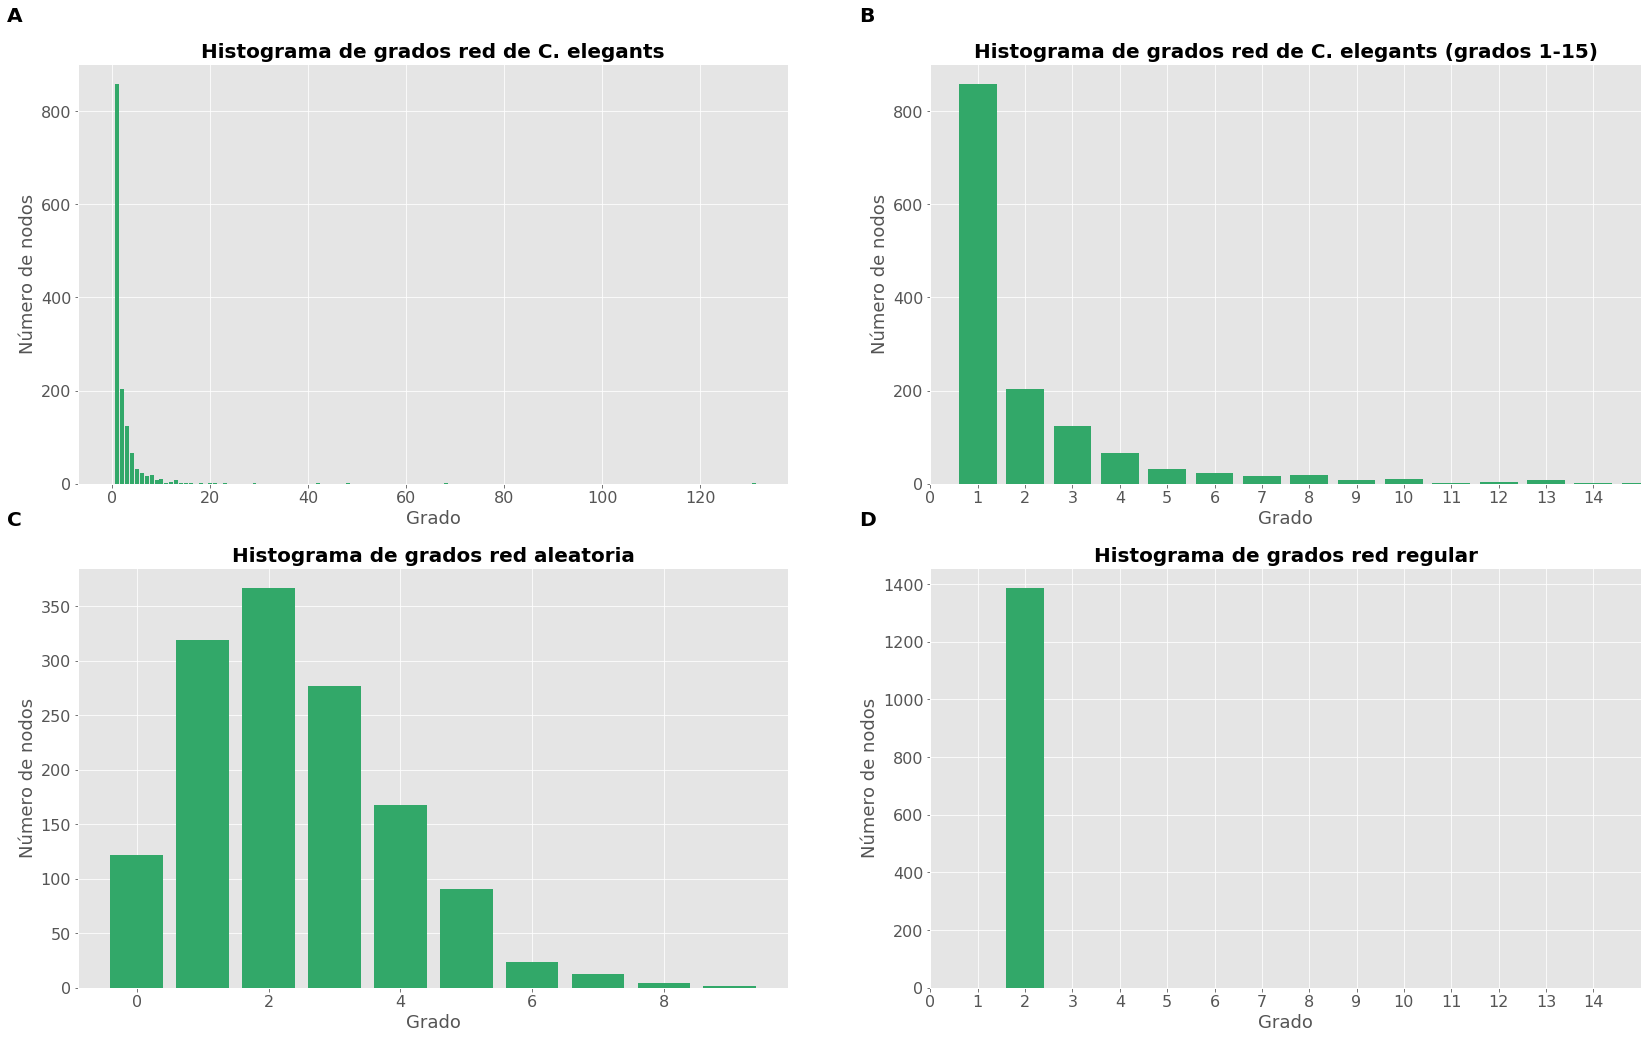

In [7]:
# Generación de un grafo regular
G_RE = nx.generators.classic.circulant_graph(n, [1])

# Cálculo de la distribución de grados de los grafos
L_AL = nx.degree_histogram(G_AL)
L_RE = nx.degree_histogram(G_RE)
L_CE = nx.degree_histogram(G_CE)

# Settings representación
textSize = 20
list_titles = ["Histograma de grados red de C. elegants", "Histograma de grados red de C. elegants (grados 1-15)",
               "Histograma de grados red aleatoria", "Histograma de grados red regular"]
list_data = [L_CE, L_CE, L_AL, L_RE]

# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    ax.bar(range(len(list_data[nax])), list_data[nax], width = 0.80, color = "#32a869")
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Número de nodos", fontsize = textSize * 0.9)
    ax.set_xlabel("Grado", fontsize = textSize * 0.9)
    ax.tick_params(labelsize = textSize * 0.8)
    if nax == 3 or nax == 1:
        ax.set_xlim(0, 15)
        ax.set_xticks(range(0, 15))

A partir de la distribución de grados de cada grafo, se puede inferir que nuestra red (A y B) no se trata de un grafo aleatorio, ya que no sigue una distribución binomial (de Poisson tendiendo a infinito) donde la media coincide con $k$, como se muestra en la gráfica C; ni es un grafo regular, ya que no hay un solo grado con probabilidad igual a 1 y el resto igual a 0, es decir, no sigue una distribución Delta, como se puede observar en la gráfica D. Por definición, un grafo es regular si todos los nodos tienen el mismo grado.

En el caso de nuestra red, se puede observar cómo la distribución se concentra en valores pequeños, teniendo la mayoría de los nodos grado 1 (alrededor de 800). Sin embargo, hay un salto significativo al pasar al grado 2, donde hay alrededor de 200 nodos. Este salto es relevante, indicando que la mayoría de los nodos presentan orden 1 en lugar de una distribución más uniforme.

Otra característica llamativa es la presencia de un reducido número de nodos con un grado alto, como es el caso de T08G11.5, con 131 ramas. Como se puede observar en el siguiente histograma, en el que se muestran únicamente los grados del 25 al 140, el número de nodos con órdenes tan altos no pasa de entre 1 y 2. Dichas proteínas probablemente sean las más importantes de la red ya que, a priori, se podría pensar que la razón por la que presentan un orden tan alto es porque la mayoría de conexiones pasan por ellas. Para corroborarlo, se podrían llevar a cabo estrategias de clusterización como el algoritmo Click.

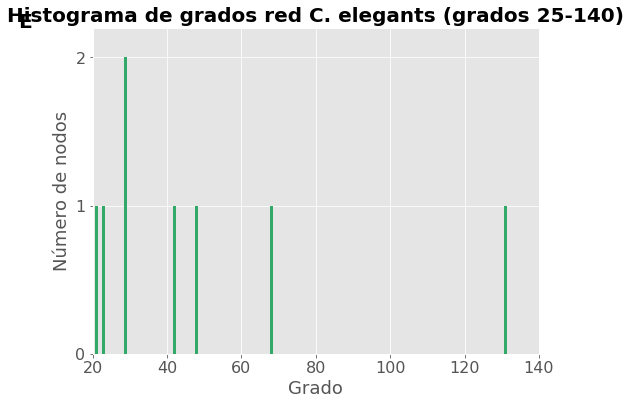

In [8]:
plt.figure(figsize = (8, 6))
plt.bar(range(len(L_CE)), L_CE, width = 0.80, color = "#32a869")
plt.title("Histograma de grados red C. elegants (grados 25-140)", fontweight = "bold",
             fontsize =  textSize)
plt.text(0, 2.2, string.ascii_uppercase[nax + 1], size = textSize + 0.2,
         weight = 'bold')
plt.ylabel("Número de nodos", fontsize = textSize * 0.9)
plt.xlabel("Grado", fontsize = textSize * 0.9)
plt.tick_params(labelsize = textSize * 0.8)
plt.xlim(20, 140)
plt.ylim(0, 2.2)
plt.yticks(range(0, 3, 1))
plt.show();

**3. Dibujad ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje**

``plt.xscale("log", nonposx='clip')``

``plt.yscale("log", nonposy='clip')``

**4. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?**

Llevando a cabo la representación de la distribución de grados del grafo ``G_CE`` en escala logarítimica-logarítimica, se obtiene la distribución típica de una red libre de escala: una recta con un _cutoff_ hacia el final (Histograma log-log A). Dicho corte indica que han desaparecido nodos de la red sin que hayan sido sustituidos. Además, la gráfica de la distribución de grado en escala lineal concuerda con la topología típica de estas redes: existencia de unos pocos nodos altamente conectados (_hubs_), mientras que el resto tienen un grado bajo (mirar Histograma A, B y E). Comparándolo con el histograma del grafo aleatorio, se puede observar cómo efectivamente el histograma no refleja ningún comportamiento lineal, ya que el logaritmo del número de nodos cae gradualmente conforme aumenta el grado, formando una curva.

La pendiente aproximada de la distribución de grado de G_CE en escala log-log es: -1.89 



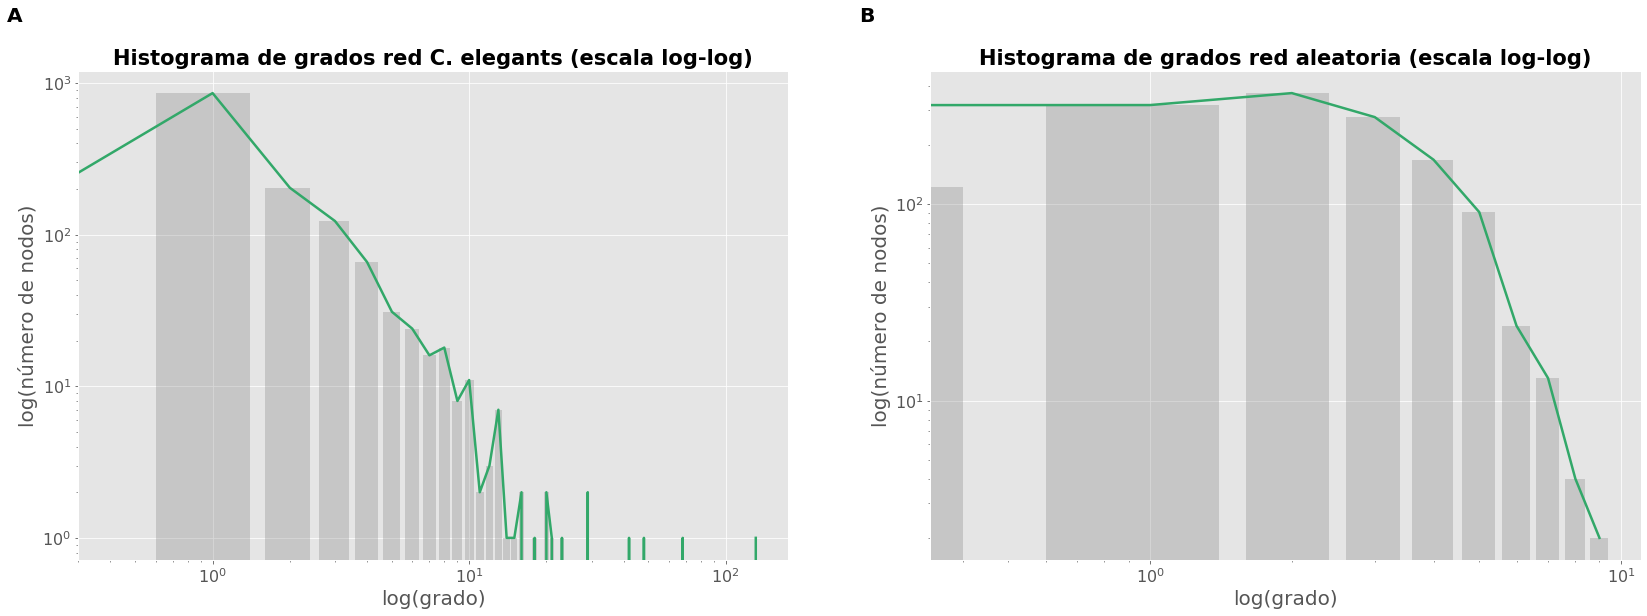

In [9]:
list_titles = ["Histograma de grados red C. elegants (escala log-log)",
              "Histograma de grados red aleatoria (escala log-log)"]
list_data_log = list_data[1:3]

textSize = 20
fig1, axs = plt.subplots(1, 2, figsize = (28, 9))

for nax, ax in enumerate(axs.flat):
    ax.plot(range(len(list_data_log[nax])), list_data_log[nax], color = "#32a869", linewidth = 2.5)
    ax.bar(range(len(list_data_log[nax])), list_data_log[nax], color = "grey", alpha = 0.3)
    ax.set_title(list_titles[nax], fontweight = "bold", fontsize = textSize + 1)
    ax.set_ylabel("log(número de nodos)", fontsize = textSize)
    ax.set_xlabel("log(grado)", fontsize = textSize)
    ax.tick_params(labelsize = textSize * 0.8)
    ax.text(-0.1, 1.1, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')


# Para calcular la pendiente aproximada, se toman dos puntos de la gráfica, 
# se miden sus distancias a los ejes y se aplica la fórmula m = (y2 - y1) / (x2 -x1)
p1 = [1.3, 4.8]
p2 = [2.25, 3]
print("La pendiente aproximada de la distribución de grado de G_CE en escala log-log es:",
      round((p2[1] - p1[1])/(p2[0] - p1[0]), 2), "\n")

### **Apartado 4**

Cálculo de parámetros de los grafos. Calculad, al menos, los siguientes parámetros para ambos grafos:

**a. degree_centrality(G):** una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos, para ello si d es el diccionario obtenido que contiene los valores, usad sum(d.values()) y dividid por el orden del grafo.

In [10]:
Centrality_dict_CE = nx.degree_centrality(G_CE)
Centrality_dict_AL = nx.degree_centrality(G_AL)
print("La centralidad promedio de todos los nodos del grafo G_CE es:", sum(Centrality_dict_CE.values())/n)
print("La centralidad promedio de todos los nodos del grafo G_AL es:", sum(Centrality_dict_AL.values())/n)

La centralidad promedio de todos los nodos del grafo G_CE es: 0.0017145395660175464
La centralidad promedio de todos los nodos del grafo G_AL es: 0.0017145395660175592


**b. closeness_centrality(G):** una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos.

In [11]:
Closeness_dict_CE = nx.closeness_centrality(G_CE)
Closeness_dict_AL = nx.closeness_centrality(G_AL)
print("La cercanía promedio de todos los nodos del grafo G_CE es:", sum(Closeness_dict_CE.values())/n)
print("La cercanía promedio de todos los nodos del grafo G_AL es:", sum(Closeness_dict_AL.values())/n)

La cercanía promedio de todos los nodos del grafo G_CE es: 0.07114268033538046
La cercanía promedio de todos los nodos del grafo G_AL es: 0.10030125052798322


**c. betweenness_centrality(G):** una vez obtenido el valor para los nodos, debéis hacer el promedio entre todos los nodos.

In [12]:
Betweenness_dict_CE = nx.betweenness_centrality(G_CE)
Betweenness_dict_AL = nx.betweenness_centrality(G_AL)
print("El betweenness promedio de todos los nodos del grafo G_CE es:", sum(Betweenness_dict_CE.values())/n)
print("El betweenness promedio de todos los nodos del grafo G_AL es:", sum(Betweenness_dict_AL.values())/n)

El betweenness promedio de todos los nodos del grafo G_CE es: 0.0025678228687606676
El betweenness promedio de todos los nodos del grafo G_AL es: 0.0039906920981572355


**d. average_clustering(G).**

In [13]:
Clustering_CE = nx.average_clustering(G_CE)
Clustering_AL = nx.average_clustering(G_AL)
print("El índice de clusterización del grafo G_CE es:", Clustering_CE)
print("El índice de clusterización del grafo G_AL es:", Clustering_AL)

El índice de clusterización del grafo G_CE es: 0.07570841434149081
El índice de clusterización del grafo G_AL es: 0.0021629416005767843


**e. El máximo k para el cual existe un k-core:** recomendación, usad core_number(G).

In [14]:
Kcore_CE = nx.core_number(G_CE)
Kcore_AL = nx.core_number(G_AL)
print("El máximo k para el cual existe un k-core en el grafo G_CE es:", max(Kcore_CE.values()))
print("El máximo k para el cual existe un k-core en el grafo G_AL es:", max(Kcore_AL.values()))

El máximo k para el cual existe un k-core en el grafo G_CE es: 6
El máximo k para el cual existe un k-core en el grafo G_AL es: 2


In [15]:
six_core = list(filter(lambda k: k[1] == 6, list(Kcore_CE.items())))

print("Proteínas que forman el 6-core: ")
for i in six_core:
    print(">> {0}".format(i[0]))

Proteínas que forman el 6-core: 
>> C02F5.1
>> F26H11.1
>> R12B2.4
>> R13F6.1
>> T10B5.6
>> W01B6.9
>> Y47G6A.24
>> Y92C3B.1


In [16]:
results = pd.DataFrame({"Grado de centralidad medio": (sum(Centrality_dict_CE.values())/n, sum(Closeness_dict_CE.values())/n),
                       "Cercanía media": (sum(Closeness_dict_CE.values())/n, sum(Closeness_dict_AL.values())/n),
                       "Betweenness medio": (sum(Betweenness_dict_CE.values())/n, sum(Betweenness_dict_AL.values())/n),
                       "Índice de clusterización medio": (Clustering_CE, Clustering_AL),
                       "Máximo k para el que existe un k-core": (max(Kcore_CE.values()), max(Kcore_AL.values()))},
                       index = ["Red C. elegants", "Red aleatoria"])
results

,Grado de centralidad medio,Cercanía media,Betweenness medio,Índice de clusterización medio,Máximo k para el que existe un k-core
Red C. elegants,0.001715,0.071143,0.002568,0.075708,6
Red aleatoria,0.071143,0.100301,0.003991,0.002163,2


### Análisis

En este notebook se ha cargado un grafo con la red de interacción de proteínas de _Caenorhabditis elegans_, con un orden de 1387 nodos y un tamaño de 1648 ramas. Además, su análisis preliminar ha mostrado que se trata de un grafo no dirigido y disperso. A continuación, se ha procedido a crear un grafo aleatorio de mismo orden y tamaño, con el cual se han hecho diferentes comparaciones.

En primer lugar, llama la atención que el nodo de mayor grado de la red de estudio tiene grado 131, mucho mayor que el nodo de mayor grado de la red aleatoria, con un grado mucho menor. Al representar las gráficas de distribucion de grado, se puede ver que la red de _C. elegans_ no coincide ni con la distribución binomial que siguen las redes aletorias, ni con la Delta que siguen las redes regulares. Además, al dibujar dicha distribución en escala logarítmica-logarítmica, se puede observar una gráfica tipica de una red libre de escala: una recta con un corte hacia el final que se explica probablemente por la desaparición de nodos del grafo.

De acuerdo a las últimas funciones ejecutadas: la centralidad de grado es el porcentaje de nodos con los que está conectado cada nodo; la cercanía es la distancia promedio de cada nodo a los demás; y el betweeness es un cálculo exacto de la centralidad. Como se puede observar, los resultados de estas 3 métricas son parecidos entre ambos grafos, lo que tiene sentido porque ambos comparten el hecho de tener muchos nodos poco conectados, con la salvedad de que la red de estudio tiene _hubs_, que explicarían el menor betweeness y la mayor cercanía (menor distancia) por el sesgo que implica tener esos pocos nodos muy conectados, que además introducen "atajos" que permiten establcer más conexiones y acercar nodos.

Este sesgo se evidencia mucho más al calcular el índice de clusterización (probabilidad local de que dos vecinos de un nodo dado estén conectados entre sí) y el máximo k-core (subgrafo G’ tal que el grado de cada nodo de G’ es al menos k). Como se puede observar, el hecho de que nuestra red sea una biológica implica un mayor índice de clusterización porque en una red proteica se llevan a cabo diferentes funciones de forma que, en caso de que una proteína interaccione con otras dos, es más lógico que a su vez esas dos estén relacionadas por estar involucradas en el mismo proceso o al menos en algunos asociados. Sin embargo, esto no tiene por qué ocurrir en una red aleatoria, ya que ese sesgo no existe, provocando la caída de dicho índice. Respecto al mayor k para el cual existe un k-core, es 6 para nuestra red (frente a 2 en la aleatoria), mostrando que hay un subgrafo donde todos los nodos tienen al menos grado 6, constituyendo un sesgo que genera un núcleo de conexión entre diferentes partes de la red. Las proteínas que forman parte del 6-core, por tanto, serán relevantes para la red, además de presentar funcionalidades relacionadas entre sí. De hecho, en el caso concreto de esta red, dichas proteínas tienen que ver con la formación del cinetocoro de los cromosomas.

A la vista de los resultados obtenidos, se puede concluir que nuestra red no es aleatoria y que tiene características de una red libre de escala. Además, el hecho de que la red presente un índice de clusterización ligeramente mayor al del grafo aleatorio, también podríamos concluir que se trata de una red de mundo pequeño, aunque se deberían medir más métricas para afirmarlo con mayor seguridad. 